<a href="https://colab.research.google.com/github/byein/NLP_Analysis_of_Lyrics_Trend_and_WordCloud/blob/develop/NLP_Analysis_of_Lyrics_Trend_using_Clustering_and_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing Data
#데이터 전처리

In [1]:
!wget https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv

--2022-05-24 01:55:39--  https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7953541 (7.6M) [text/plain]
Saving to: ‘billboard_lyrics_1964-2015.csv.1’

billboard_lyrics_19 100%[===================>]   7.58M  --.-KB/s    in 0.07s   

2022-05-24 01:55:39 (113 MB/s) - ‘billboard_lyrics_1964-2015.csv.1’ saved [7953541/7953541]



In [2]:
import numpy as np
from math import log
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import re
import random
import operator
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
nltk.download('all')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# remove nan value, reset index consider the drop is true. 
# Ex) there is an array {0,nan,nan,3}, after drop the array becomes {0:0,3:3}.
#     after reset_index(drop=True), the array's index becomes {0:0,1:3}  
data = pd.read_csv("billboard_lyrics_1964-2015.csv", encoding="latin1").dropna().reset_index(drop=True)

len(data)  


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

4913

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    4913 non-null   int64  
 1   Song    4913 non-null   object 
 2   Artist  4913 non-null   object 
 3   Year    4913 non-null   int64  
 4   Lyrics  4913 non-null   object 
 5   Source  4913 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 230.4+ KB


## Classify Data as the times

## 시대별 데이터 분류

In [4]:
data_60s = []
data_70s = []
data_80s = []
data_90s = []
data_00s = []
data_10s = []
cnt_60s = 0;
cnt_70s = 0;
cnt_80s = 0;
cnt_90s = 0;
cnt_00s = 0;
cnt_10s = 0;
for i, d in enumerate(data['Year']):
  if ((d >= 1960) & (d < 1970)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_60s.append(data['Lyrics'][i])  
    cnt_60s+=1
  elif ((d >= 1970) &(d < 1980)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_70s.append(data['Lyrics'][i])  
    # data_70s += data['Lyrics'][i] + ' '  
    cnt_70s+=1
  elif ((d >= 1980) &(d < 1990)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_80s.append(data['Lyrics'][i])  
    # data_80s += data['Lyrics'][i] + ' ' 
    cnt_80s+=1
  elif ((d >= 1990) &(d < 2000)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_90s.append(data['Lyrics'][i])  
    # data_90s += data['Lyrics'][i] + ' '
    cnt_90s+=1
  elif ((d >= 2000) &(d < 2010)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_00s.append(data['Lyrics'][i])  
    # data_00s += data['Lyrics'][i] + ' ' 
    cnt_00s+=1
  else:
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_10s.append(data['Lyrics'][i])  
    # data_10s += data['Lyrics'][i] + ' ' 
    cnt_10s+=1


data_times = [data_60s, data_70s, data_80s, data_90s, data_00s, data_10s]

In [5]:
print(cnt_60s)
print(data_60s[:100])
print(cnt_70s)
print(data_70s[:100])
print(cnt_80s)
print(data_80s[:100])
print(cnt_90s)
print(data_90s[:100])
print(cnt_00s)
print(data_00s[:100])
print(cnt_10s)
print(data_10s[:100])

print(len(data_times))

474
['sam the sham miscellaneous wooly bully wooly bully sam the sham  the pharaohs  domingo samudio uno dos one two tres quatro matty told hatty about a thing she saw had two big horns and a wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take no chance lets not belseven come and learn to dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats the thing to do get you someone really to pull the wool with you wooly bully wooly bully wooly bully wooly bully wooly bully lseven  the letter l and the number 7 when typed they form a rough square l7 so the lyrics mean lets not be square', ' sugar pie honey bunch you know that i love you i cant help myself i love you and nobody elsein and out my life you come and you go leaving just your picture behind and i kissed it a thousand timeswhen you snap your finger or wink your eye i come arunning to you im tied to your apron strings and theres nothing that i can docan

## Text Tokenize & Lemmanize


In [6]:
stop = stopwords.words('english')
new_stop = ['doe', 'ha', 'wa']
stop.extend(new_stop)

In [7]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
def remove_encoding_word(word):
  word = str(word)
  word = word.encode('ASCII','ignore').decode('ASCII')
  return word

In [9]:
def remove_encoding_text(text):
  text = str(text)
  text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
  return text

In [10]:
clear_data60s = ([remove_encoding_text(x) for x in data_60s])
clear_data70s = ([remove_encoding_text(x) for x in data_70s])
clear_data80s = ([remove_encoding_text(x) for x in data_80s])
clear_data90s = ([remove_encoding_text(x) for x in data_90s])
clear_data00s = ([remove_encoding_text(x) for x in data_00s])
clear_data10s = ([remove_encoding_text(x) for x in data_10s])

clear_data = [clear_data60s, clear_data70s, clear_data80s, clear_data90s, clear_data00s, clear_data10s];

In [11]:
print(clear_data60s[:3])
print(clear_data70s[:3])
print(clear_data80s[:3])
print(clear_data90s[:3])
print(clear_data00s[:3])
print(clear_data10s[:3])

['sam sham miscellaneous wooly bully wooly bully sam sham pharaohs domingo samudio uno dos one two tres quatro matty told hatty thing saw two big horns wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take chance lets belseven come learn dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats thing get someone really pull wool wooly bully wooly bully wooly bully wooly bully wooly bully lseven letter l number 7 typed form rough square l7 lyrics mean lets square', 'sugar pie honey bunch know love cant help love nobody elsein life come go leaving picture behind kissed thousand timeswhen snap finger wink eye come arunning im tied apron strings theres nothing docant help cant help myselfsugar pie honey bunch im weaker man cant help im fool love seewanna tell dont love tell ive tried every time see face get choked insidewhen call name girl starts flame burning heart tearing apart matter try love cannot hidecause

In [12]:
for cd in clear_data:
  text = ' '.join(words for words in cd)
  print(len(text))
  print(text[:1000])

284317
sam sham miscellaneous wooly bully wooly bully sam sham pharaohs domingo samudio uno dos one two tres quatro matty told hatty thing saw two big horns wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take chance lets belseven come learn dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats thing get someone really pull wool wooly bully wooly bully wooly bully wooly bully wooly bully lseven letter l number 7 typed form rough square l7 lyrics mean lets square sugar pie honey bunch know love cant help love nobody elsein life come go leaving picture behind kissed thousand timeswhen snap finger wink eye come arunning im tied apron strings theres nothing docant help cant help myselfsugar pie honey bunch im weaker man cant help im fool love seewanna tell dont love tell ive tried every time see face get choked insidewhen call name girl starts flame burning heart tearing apart matter try love cannot hidecau

In [13]:
lemma = WordNetLemmatizer().lemmatize

In [14]:
def tokenize(document):
  tokens = [lemma(w) for w in document.split() if len(w) > 2 and w.isalpha()]
  return tokens

# TF-IDF & Clustering

In [15]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words = stop, ngram_range=(1,2), min_df=1, sublinear_tf=True)

In [16]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

In [17]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=data.shape[0], replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

In [18]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/


Cluster 0
make everything,thing make,sing make,everything groovy,thing wild,groovy wild,make heart,heart sing,wild,wild thing

Cluster 1
lady stay,lady,big brass,lay lay,lady lay,lay lady,lay across,brass,across big,lay

Cluster 2
log,foot way,mother pick,green,fly,river,water,come home,cody,flat

Cluster 3
woah whats,woah woah,woah woahpussycat,woahpussycat,woahpussycat pussycat,whats new,pussycat woah,new pussycat,woah,pussycat

Cluster 4
chicago mornin,chicago,mama cry,angry young,ghettoand mama,born ghetto,young man,ghetto ghettoand,ghettoand,ghetto

Cluster 5
poet,rhyme,star fall,fall sky,run rhyme,run dry,river run,poet run,baby ill,baby till

Cluster 6
gurdy,flash,song,whoaoh,yellow,hawaii fiveo,fiveo,hawaii,wipe,instrumental

Cluster 7
whenever away,world thats,changing sure,really wanna,sure world,thats constantly,whenever whenever,constantly changing,whenever,really really

Cluster 8
god,ship,great,atlantis,way ocean,area,may way,ocean,wanna may,ocean wanna

Cluster 9
elsesu

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/


Cluster 0
answer much,love measured,star burn,ill need,measured hour,last love,measured,long last,need till,day answer

Cluster 1
sunset horse,outlaw,mine,kid,fort,friend mine,mine cisco,cisco,cisco kid,kid friend

Cluster 2
youre fool,aint wise,hit late,cold rain,game nothing,late hit,heartache nothing,nothing heartache,heartache,fool game

Cluster 3
doin lovin,baby always,trouble baby,layin trouble,youve doin,teach baby,take baby,take take,baby come,come take

Cluster 4
always best,cause boogie,dancing got,best town,got keep,boogie,dancing keep,night boogie,keep dancing,boogie night

Cluster 5
rock roll,hey kid,dean,rock onrock,jimmy dean,onrock,onrock hey,rock,hey rock,roll rock

Cluster 6
would stay,wind would,woman taken,promised heaven,stay promised,unwind love,heaven ever,seen woman,love state,rhiannon

Cluster 7
andeveryday love,share tomorrow,way melt,tomorrow together,andeveryday,ever day,care well,forever,always forever,forever love

Cluster 8
dont look,back dont,see beyond

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/


Cluster 0
lover,night long,turn,one,want one,come,got,like,night,want

Cluster 1
youre,please,need,baby,girl,let,want,love,dont,know

Cluster 2
hurt good,like,hurt,valley,valley road,nanananana nanananana,said,nanananana,walk walk,walk

Cluster 3
want,one,like,got,youre,baby,time,dont,know,love

Cluster 4
dont mind,take home,take take,breakdown takedown,takedown,girl mine,home cause,dont remember,remember take,breakdown

Cluster 5
give need,done never,hush,dont stand,need ill,need need,stand dont,maybe didnt,always mind,mind always

Cluster 6
get,tight,love,time,though,hold tight,know,away,hold,still

Cluster 7
baby surrender,right,baby,back,night,love,see,surrender,holding,tonight

Cluster 8
right,stand stand,heart,darlin,feel,baby,know,forever,love,wanna

Cluster 9
kyrie eleison,usa,long,night,take find,see chance,eleison,seems,like yesterday,wind

Cluster 10
feel,ive love,love,cant,disguise,eye,hungry,got,ive got,ive

Cluster 11
talk talk,funkytown wont,side,take funkytown,funkytow

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/


Cluster 0
get crewaiy,aightaiy aiy,crewaiy aiy,crewaiy,tryin get,aiy,aiy dat,dat tryin,dat,dat dat

Cluster 1
summer madness,sit back,summer,unwind,time sit,summer summer,summer summertime,summertime time,back unwind,summertime

Cluster 2
cuz time,cuz always,man many,could mean,many wish,hope premonition,wish hope,premonition miss,let hide,cry cuz

Cluster 3
arc,joan,joan arc,aphrodite,shes lovely,arc aphrodite,like cleopatra,aphrodite shes,high high,shes high

Cluster 4
pumpin every,hotif aint,til know,hotif,baby stop,work harder,youre hotif,stop til,enough good,good enough

Cluster 5
january february,girl ill,til,tell girl,november tell,november ill,november,ill gone,gone til,til november

Cluster 6
tell nowhow,nowhow,ever survive,nowhow live,away everything,life tell,without ever,know breathe,live without,ever ever

Cluster 7
youve made,girli cant,made difference,stop diggin,cant stop,stop feel,feel diggin,stop cant,diggin,diggin diggin

Cluster 8
get,make,time,youre,like,want,baby

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/


Cluster 0
far sidewalk,safe side,disturbia,without,life,bedum bum,bum bedum,bedum,bum,bum bum

Cluster 1
like,crazy girl,time,touch,crazy,every time,got,looking,aye,aye aye

Cluster 2
breath hit,noise make,bring noise,breath bring,hah,yes youre,youre yes,make lose,lose breath,youre youre

Cluster 3
rock move,youre,apologize,want,apologize late,dont want,didnt,late,late apologize,need

Cluster 4
fuck,back,club,bitch,aint,shit,got,like,get,nigga

Cluster 5
woh woh,woh,feel,see,know,love,youre,feel way,girl,way

Cluster 6
away pain,dont,stand forever,forever take,kiss away,cry dont,loved loved,dont cry,cry,loved

Cluster 7
keep love,thing,save life,way wanted,lockdown love,know,lockdown,love lockdown,lost,somewhere

Cluster 8
still,loved,one,hold,love,time,never let,never,far,youll

Cluster 9
cause,one,baby,time,way,life,nobody,got,like,aint

Cluster 10
tell,get,hey hey,like,gonna act,handle,know,act like,gonna,act

Cluster 11
photo friend,photo,floor hard,hard say,time say,say time,say 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/


Cluster 0
round,party,wanna,rock,put hand,mind,dance,tonight,another round,body

Cluster 1
mmm thats,baby gonna,gonna shake,fake,play play,break break,hate hate,fake fake,shake,shake shake

Cluster 2
heyho,youre sweetheart,sweetheart belong,ive,youre,sweetheart,coming home,belong belong,belong youre,belong

Cluster 3
money,love,give fuck,fuckin,bitch love,bad,got,fuck,nigga,bitch

Cluster 4
chain love,take way,chain,said shut,change wouldnt,shut dance,got chain,wouldnt change,way take,change

Cluster 5
baby baby,yeah yeah,pretty please,fuckin perfect,like baby,ever take,gonna ever,ever ever,part youre,ever

Cluster 6
wanna,girl,know,love,baby,hey hey,let,hey,ooh,let love

Cluster 7
take bite,say goodbye,bite heart,waitin take,heart tonight,waitin waitin,like animal,waitin,want waitin,animal

Cluster 8
feel like,like,like one,girl world,tonight yeah,yeah,baby,feel,make feel,tonight

Cluster 9
hear,singin,beat,heart stereo,low,sing along,radio,sing,melody,stereo

Cluster 10
come come,dr

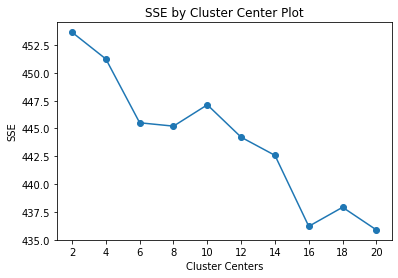

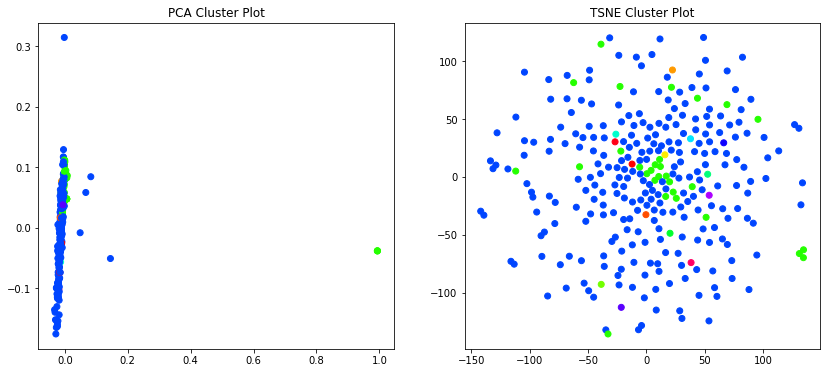

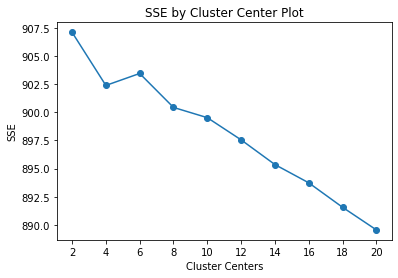

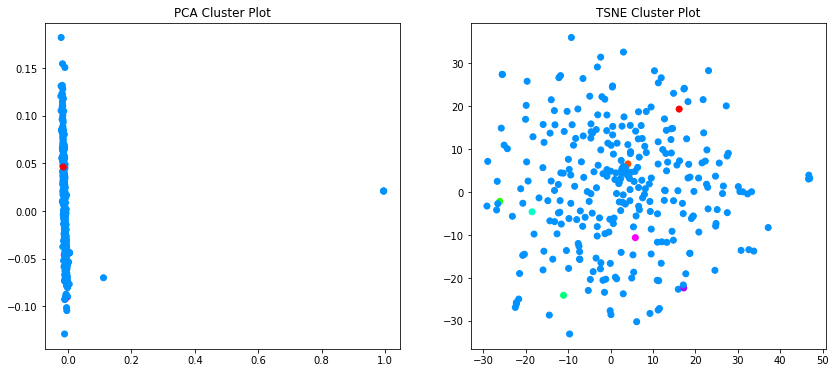

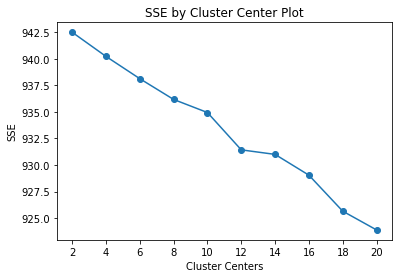

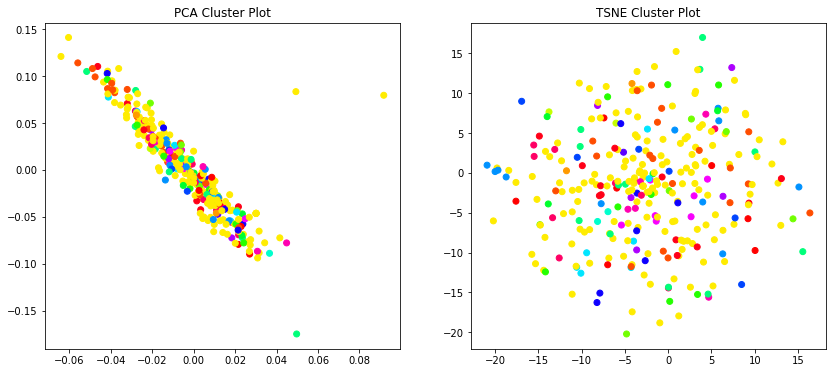

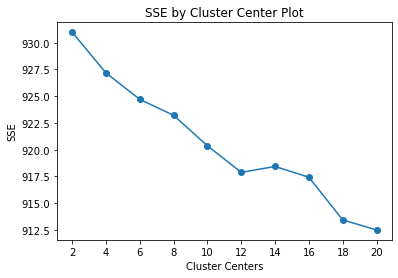

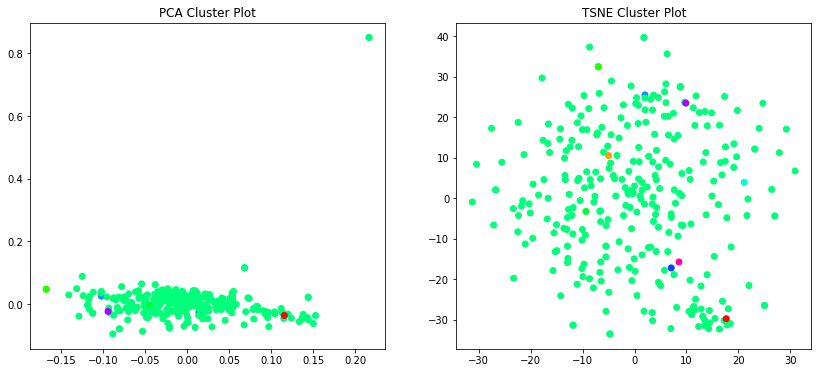

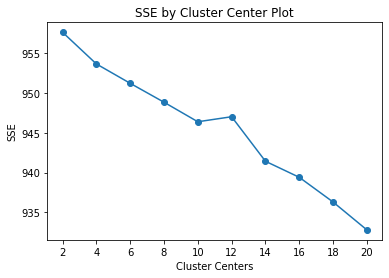

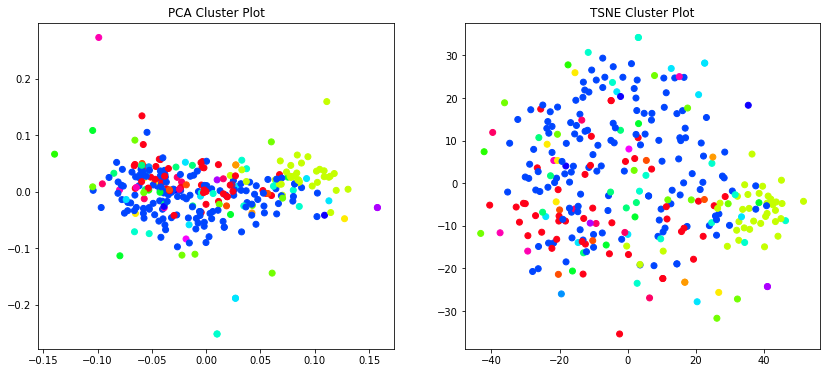

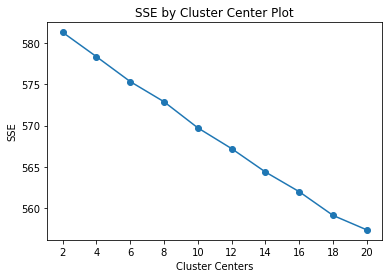

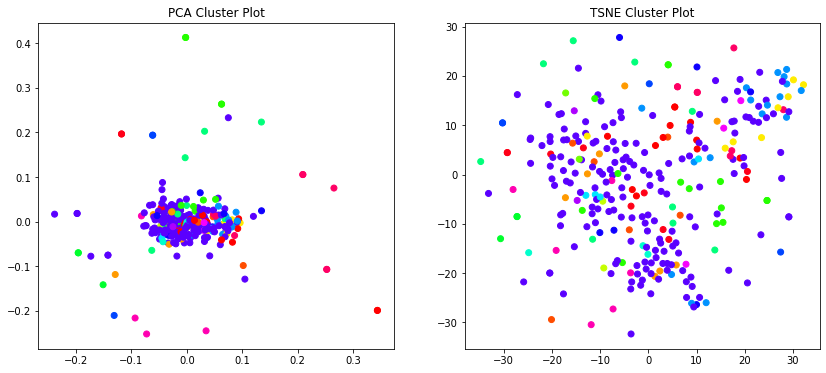

In [19]:
times = 60

# get clustering & cluster plots
for cd in clear_data:
  vectorizer.fit(cd)
  tdm = vectorizer.transform(cd)
  find_optimal_clusters(tdm, 20)
  clusters = MiniBatchKMeans(n_clusters=20, init_size=1024, batch_size=2048, random_state=20).fit_predict(tdm)
  plot_tsne_pca(tdm, clusters)
  kmeans = KMeans(n_clusters=2).fit(tdm)
  get_top_keywords(tdm, clusters, vectorizer.get_feature_names(), 10)
  
  plt.savefig(f'data{times:02d}s_cluster_plot.png')
  times += 10
  if times > 90:
    times -= 100

# TF-IDF & WordCloud

In [20]:
# setting color for wordcloud
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

In [21]:
icon60s = Image.open("1960s.png")
icon70s = Image.open("1970s.png")
icon80s = Image.open("1980s.png")
icon90s = Image.open("1990s.png")
icon00s = Image.open("2000s.png")
icon10s = Image.open("2010s.png")

icons = [icon60s,icon70s,icon80s,icon90s,icon00s,icon10s]

  (0, 63819)	0.16427718402214217
  (0, 60222)	0.15432377753754298
  (0, 59858)	0.16427718402214217
  (0, 59852)	0.12482240857583703
  (0, 58995)	0.16427718402214217
  (0, 58148)	0.1560184552890735
  (0, 56694)	0.15432377753754298
  (0, 56649)	0.09448260856470413
  (0, 56483)	0.15432377753754298
  (0, 56327)	0.05507446630927269
  (0, 55257)	0.13352420724328412
  (0, 55224)	0.04812031602280023
  (0, 52953)	0.22607613503046836
  (0, 52075)	0.09073758606058081
  (0, 48251)	0.10227529196318513
  (0, 48101)	0.26129286883105113
  (0, 47492)	0.13024626247647592
  (0, 45670)	0.06460093819154696
  (0, 44684)	0.16427718402214217
  (0, 44649)	0.09135909067127951
  (0, 41413)	0.14178396837908022
  (0, 41186)	0.04716584120231313
  (0, 40714)	0.10901220082413739
  (0, 36256)	0.07807534213023397
  (0, 35055)	0.13352420724328412
  :	:
  (473, 31680)	0.04505391811807139
  (473, 31221)	0.058845059972000235
  (473, 30354)	0.2377035865350547
  (473, 29066)	0.1336866600467379
  (473, 28932)	0.04717183776323

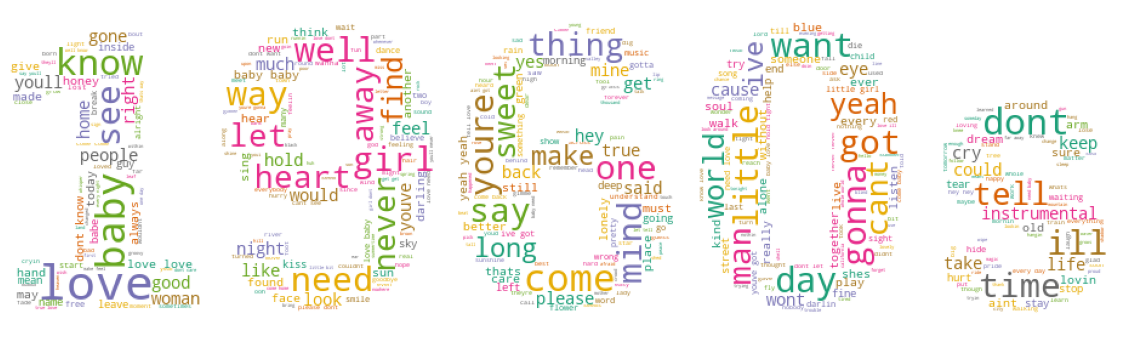

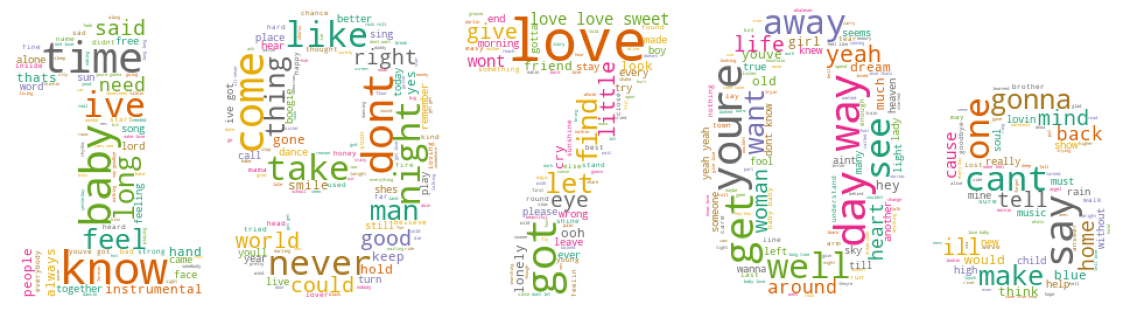

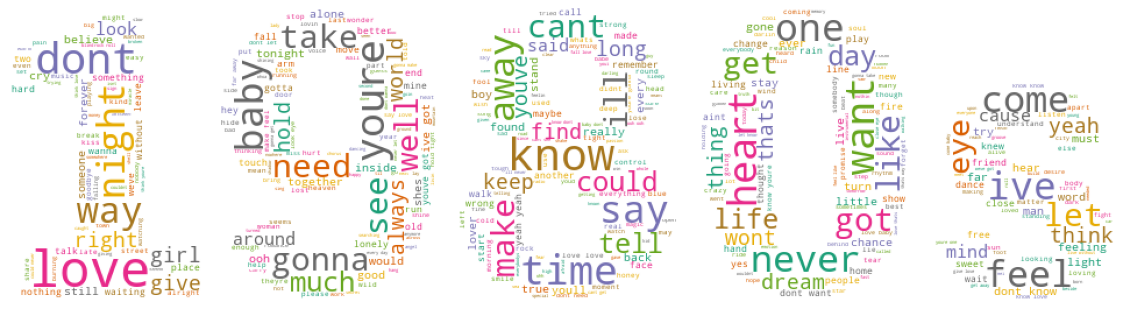

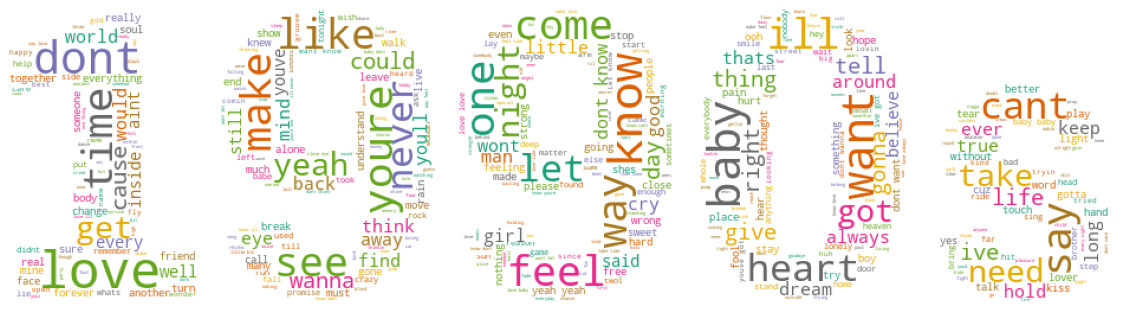

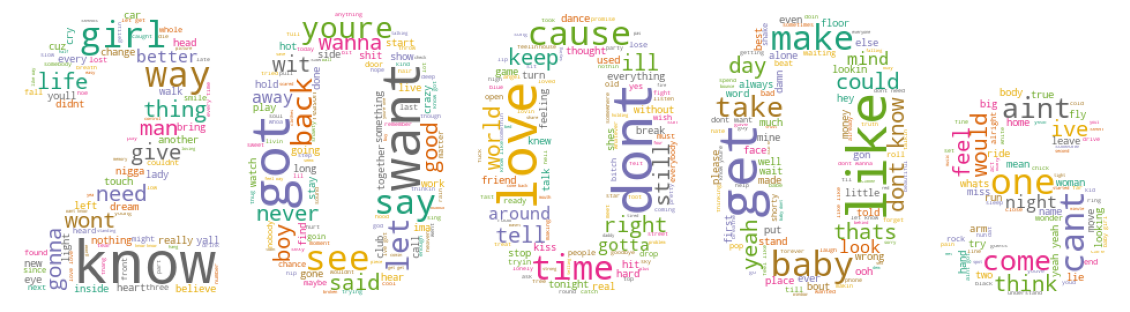

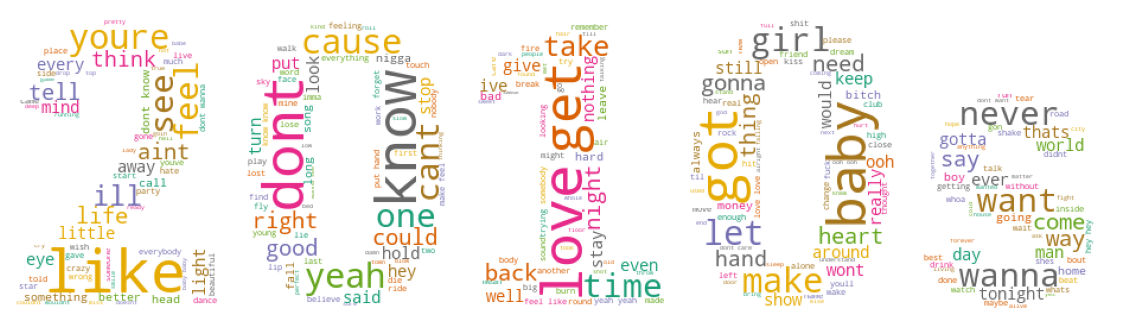

In [22]:
times = 60
i = 0
for cd in clear_data:
  tdm = vectorizer.transform(cd)
  print(tdm)
  tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]  
  sorted_tfidf_weights = (sorted(tfidf_weights, key=operator.itemgetter(1),reverse=True))
  mask = Image.new("RGB", icons[i].size, (255,255,255))
  mask.paste(icons[i],icons[i])
  mask = np.array(mask)
  w = WordCloud(mask=mask, width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(sorted_tfidf_weights))
  w.recolor(color_func=color_func, random_state=3)
  
  plt.figure(figsize=(20,15))
  plt.imshow(w)
  plt.axis('off')
  plt.savefig(f'data{times:02d}s_wordcloud.png')
  times += 10
  if times > 90:
    times -= 100
  i+=1